In [2]:
import json
import keras_cv
import keras_core as keras
import numpy as np

2024-12-21 17:05:47.886680: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 17:05:47.897967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734768347.911661    8438 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734768347.915857    8438 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 17:05:47.929094: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Using TensorFlow backend


In [3]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet_classifier"
)

I0000 00:00:1734768351.029839    8438 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2278 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


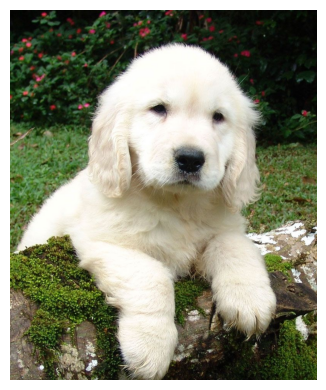

In [4]:
url = 'https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg'

filepath = keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
image_batch = image.reshape((1, h, w, c))
keras_cv.visualization.plot_image_gallery(
    image_batch, rows=1, cols=1, value_range=(0, 255), show=True, scale=4
)

In [5]:
probs = model.predict(image_batch)
probs.shape

I0000 00:00:1734775350.024040    8518 service.cc:148] XLA service 0x7183a00153d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734775350.029182    8518 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-21 19:02:30.129876: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734775350.567394    8518 cuda_dnn.cc:529] Loaded cuDNN version 90600


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


I0000 00:00:1734775356.721617    8518 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(1, 1000)

In [6]:
top_classes = (-probs[0]).argsort()

In [7]:
top_classes[:5]

array([361, 229, 257, 203, 222])

In [15]:
# url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/kerascv/master/imagenet_label_names.json"
# label_names_filepath = keras.utils.get_file(origin=url)

# with open(label_names_filepath) as f:
#     label_name = json.load(f)

url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
label_names_filepath = keras.utils.get_file(origin=url)

with open(label_names_filepath) as f:
    label_names = json.load(f)


In [16]:
for c in top_classes[:5]:
    print(label_names[c])


skunk
Old English Sheepdog
Pyrenean Mountain Dog
West Highland White Terrier
Kuvasz
